# Student performance indicator

### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

### Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### import the CSV Data as Pandas DataFrame 

In [4]:
df = pd.read_csv('data/students.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### Dataset information
 - gender : sex of students -> (Male/female)
 - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
 - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's   degree,high school)
 - lunch : having lunch before test (standard or free/reduced)
 - test preparation course : complete or not complete before test
 - math score
 - reading score
 - writing score
 
 ### Data Checks to perform
 - Check Missing values
 - Check Duplicates
 - Check data type
 - Check the number of unique values of each column
 - Check statistics of data set
 - Check various categories present in the different categorical column

### Checking mising values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

######     there are no missing values in the dataset 

###  Checking duplicates

In [7]:
df.duplicated().sum()

0

##### there are no duplicates

### Checking data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Checking statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### Check various categories present in the different categorical column

In [11]:
for col in df.select_dtypes('object'):
    print('feature name = ',col,'\n',df[col].unique(),'\n')

feature name =  gender 
 ['female' 'male'] 

feature name =  race_ethnicity 
 ['group B' 'group C' 'group A' 'group D' 'group E'] 

feature name =  parental_level_of_education 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

feature name =  lunch 
 ['standard' 'free/reduced'] 

feature name =  test_preparation_course 
 ['none' 'completed'] 



###  Adding columns for "Total Score" and "Average"

In [12]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg Score'] = df['Total Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Avg Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Number of students with maximum marks

In [13]:
for col in df.select_dtypes('int'):
    n=0
    for i in df[col]:
        if i==100:
            n=n+1
    print(col,'     No. of students with max marks=',n)

math_score      No. of students with max marks= 7
reading_score      No. of students with max marks= 17
writing_score      No. of students with max marks= 14
Total Score      No. of students with max marks= 0


 - Number of students with full marks in Maths 7
 - Number of students with full marks in Reading 17
 - Number of students with full marks in Writing 14

### Number of students with marks less than 20

In [14]:
for col in df.select_dtypes('int'):
    n=0
    for i in df[col]:
        if i<20:
            n=n+1
    print(col,'    No. of students with less than 20 =',n)

math_score     No. of students with less than 20 = 4
reading_score     No. of students with less than 20 = 1
writing_score     No. of students with less than 20 = 3
Total Score     No. of students with less than 20 = 0


##### Insights
 - From above values we get students have performed the worst in Maths
 - Best performance is in reading section

## Data Visualization

### Visualize average score distribution to make some conclusion.
 - Histogram
 - Kernel Distribution Function (KDE)

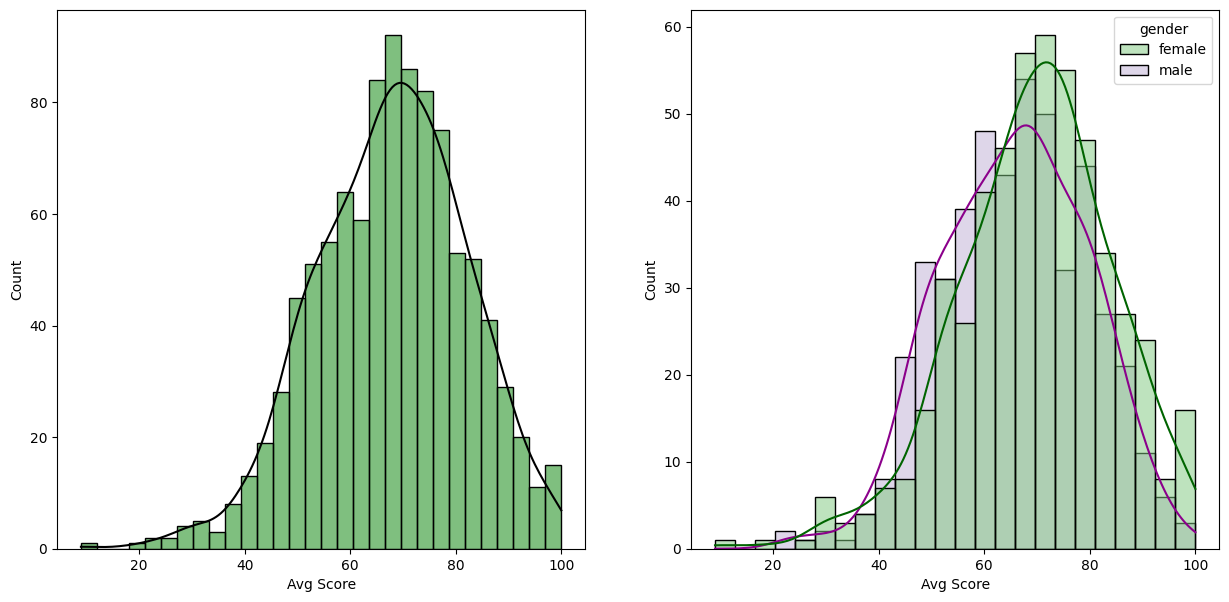

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
ax1 = sns.histplot(data=df,x=df['Avg Score'],bins=30,kde=True,color='green')
ax1.lines[0].set_color('black')
plt.subplot(122)
ax2 = sns.histplot(data=df,x=df['Avg Score'],kde=True,hue='gender',palette='Accent')
ax2.lines[0].set_color('darkmagenta')
ax2.lines[1].set_color('darkgreen')
plt.show()

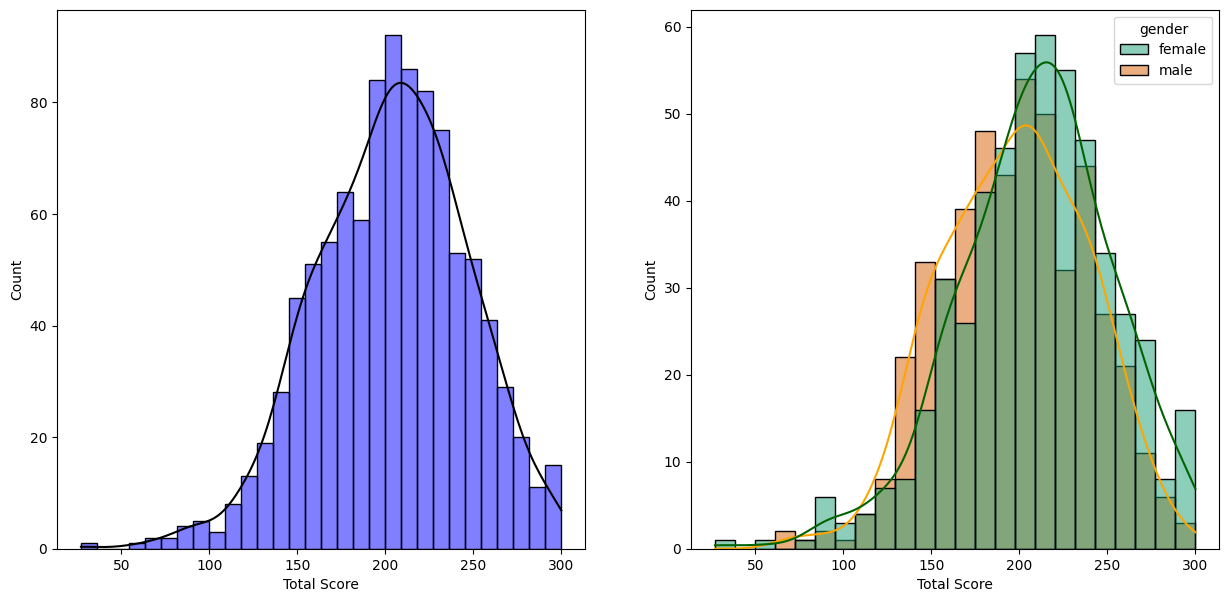

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
ax1 = sns.histplot(data=df,x=df['Total Score'],bins=30,kde=True,color='blue')
ax1.lines[0].set_color('black')
plt.subplot(122)
ax2 = sns.histplot(data=df,x=df['Total Score'],kde=True,hue='gender',palette='Dark2')
ax2.lines[0].set_color('orange')
ax2.lines[1].set_color('darkgreen')
plt.show()

##### insights
Female students tend to perform well then male students.

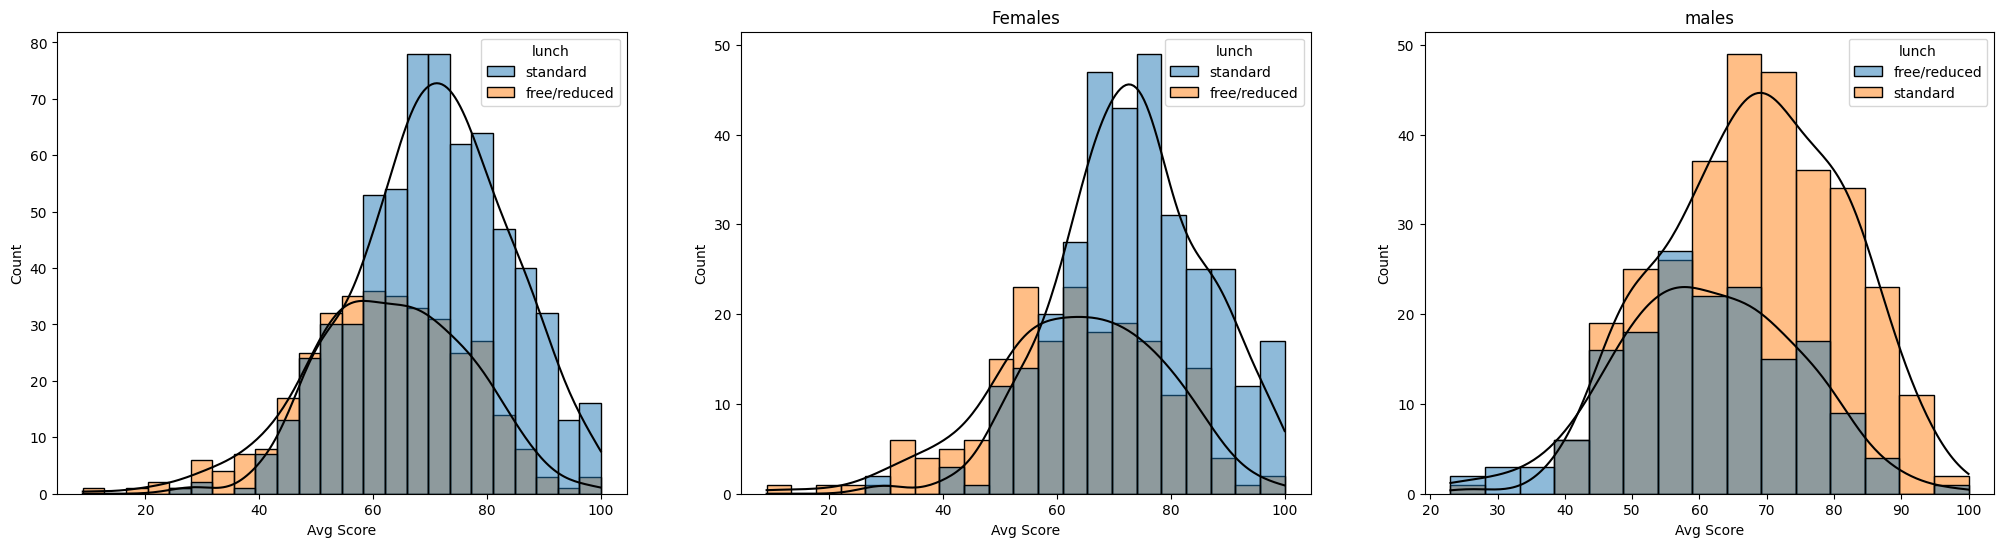

In [17]:
plt.subplots(1,3,figsize=(25,6))

ax1 = plt.subplot(131)
sns.histplot(data=df,x=df['Avg Score'],kde=True,hue='lunch')
ax1.lines[0].set_color('black')
ax1.lines[1].set_color('black')

plt.subplot(132)
ax2 = sns.histplot(data=df[df.gender=='female'],x=df['Avg Score'],kde=True,hue='lunch')
ax2.lines[0].set_color('black')
ax2.lines[1].set_color('black')
ax2.set_title('Females')

plt.subplot(133)
ax3 = sns.histplot(data=df[df.gender=='male'],x=df['Avg Score'],kde=True,hue='lunch')
ax3.lines[0].set_color('black')
ax3.lines[1].set_color('black')
ax3.set_title('males')

plt.show()

##### insights
 - Standard lunch helps perform well in exams.
 - Standard lunch helps perform well in exams be it a male or a female.

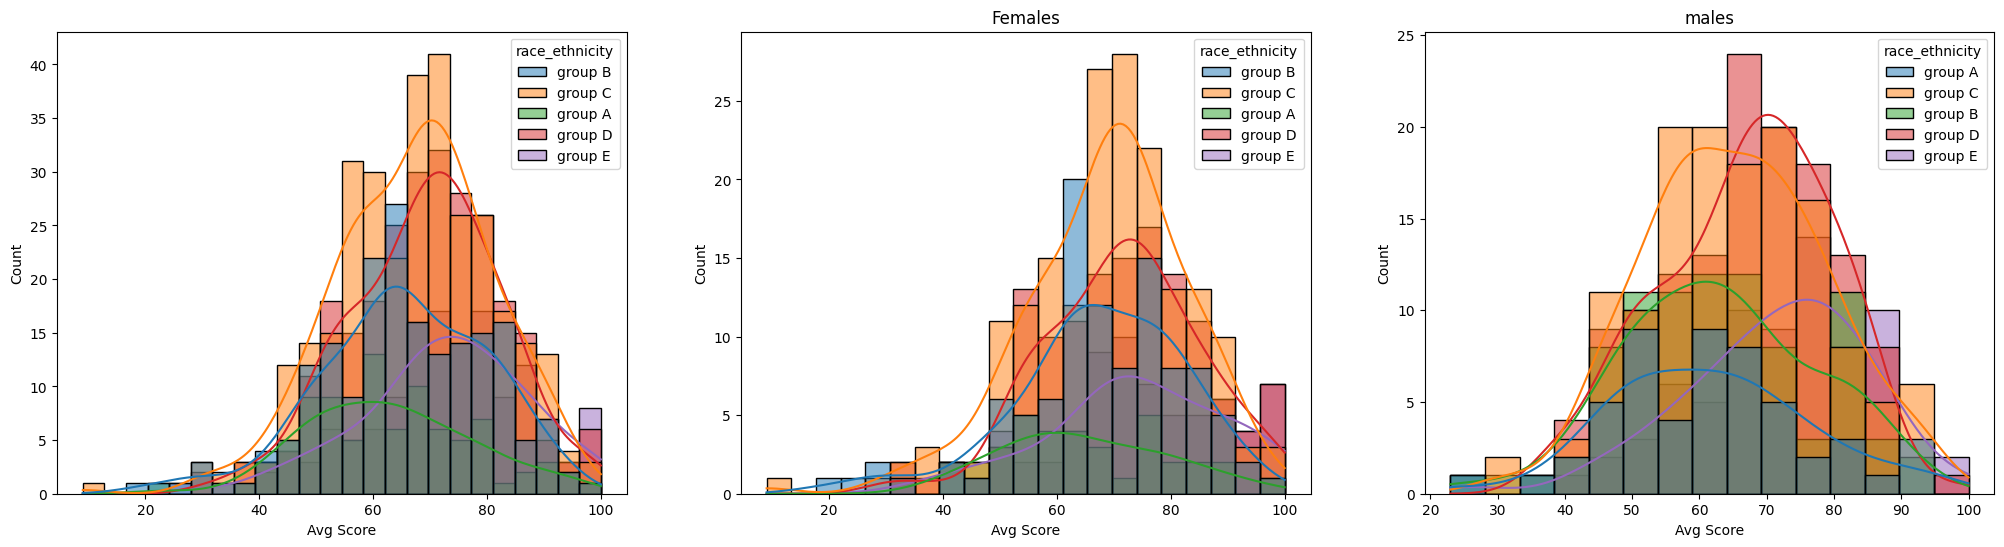

In [18]:
plt.subplots(1,3,figsize=(25,6))

ax1 = plt.subplot(131)
sns.histplot(data=df,x=df['Avg Score'],kde=True,hue=df['race_ethnicity'])

plt.subplot(132)
ax2 = sns.histplot(data=df[df.gender=='female'],x=df['Avg Score'],kde=True,hue='race_ethnicity')
ax2.set_title('Females')

plt.subplot(133)
ax3 = sns.histplot(data=df[df.gender=='male'],x=df['Avg Score'],kde=True,hue='race_ethnicity')
ax3.set_title('males')

plt.show()

##### Insights
 - Students of group A and group B tends to perform poorly in exam.
 - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

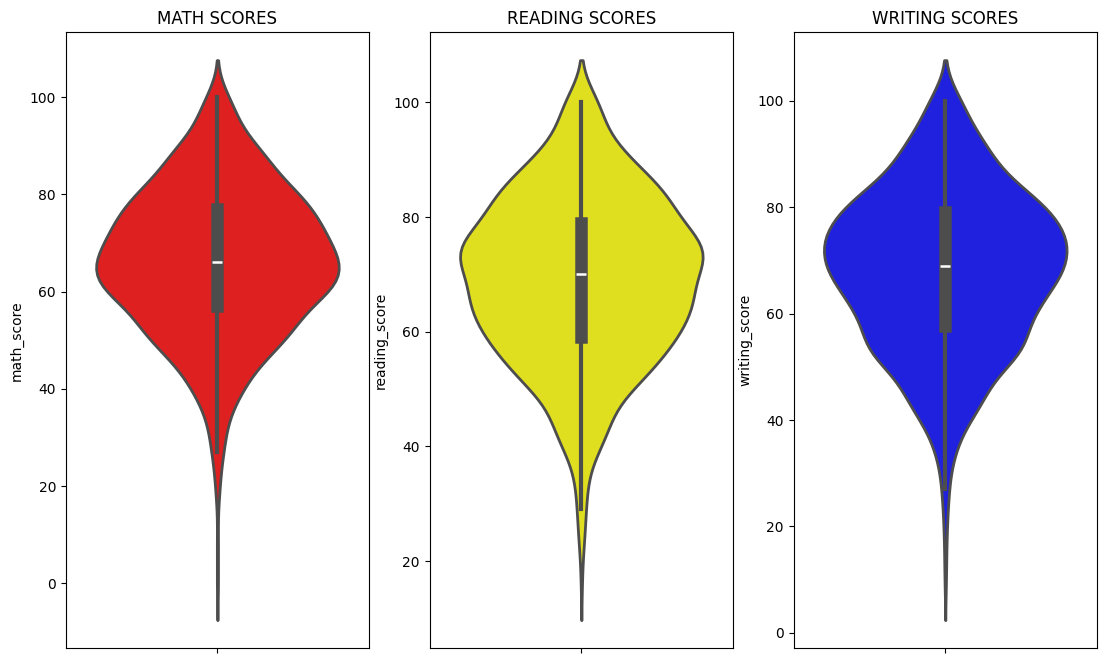

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)

plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=2)
plt.subplot(1, 4, 2)

plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='yellow',linewidth=2)
plt.subplot(1, 4, 3)

plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=2)
plt.show()

##### Insights
 - From the above three plots its clearly visible that most of the students score in between 60-80 in Maths
 - whereas in reading and writing most of them score from 50-80

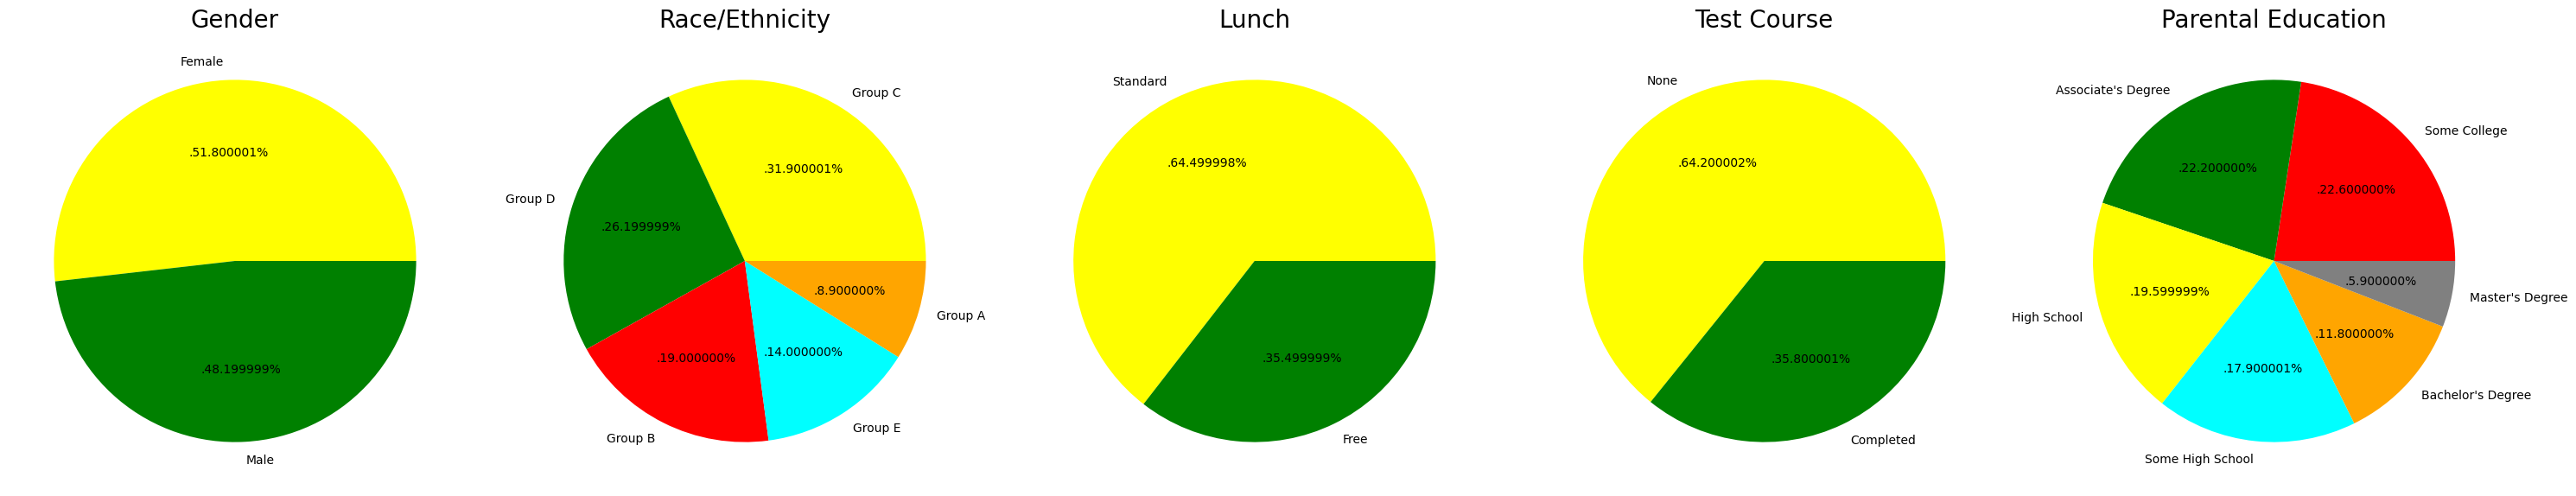

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['yellow','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['yellow', 'green', 'red', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['yellow','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['yellow','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'yellow', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights
 - Number of Male and Female students is almost equal
 - Number students are greatest in Group C
 - Number of students who have standard lunch are greater
 - Number of students who have not enrolled in any test preparation course is greater
 - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree" 

### Gender column visualization

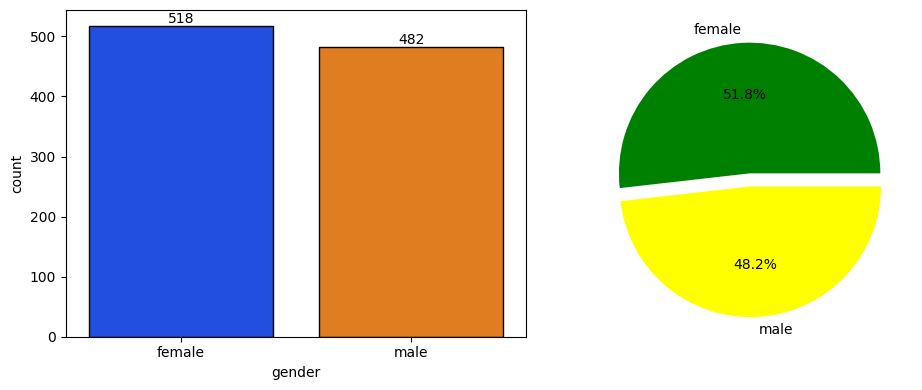

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1 = sns.countplot(x=df['gender'],palette='bright',ax=ax1,edgecolor='black')
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

ax2.pie(df['gender'].value_counts(),labels=df['gender'].unique(),autopct='%1.1f%%',explode=(0,0.1),colors=('green','yellow'))
plt.tight_layout()
plt.show()

##### Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### Checking if gender has any impact on student's performance ? 

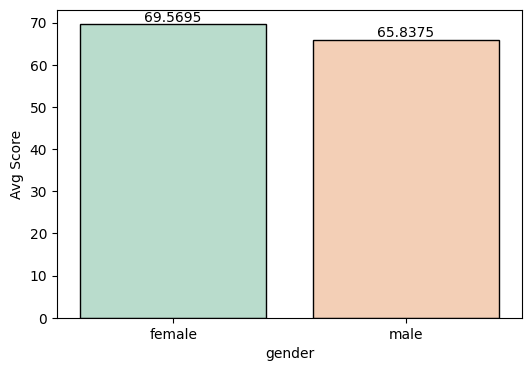

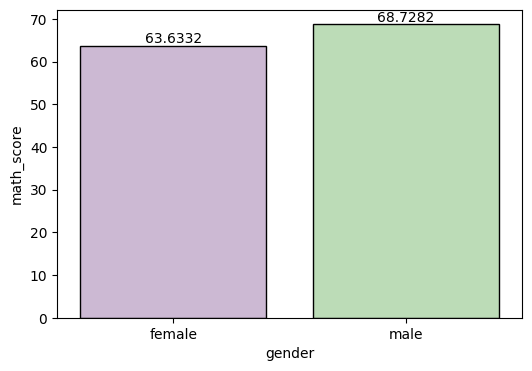

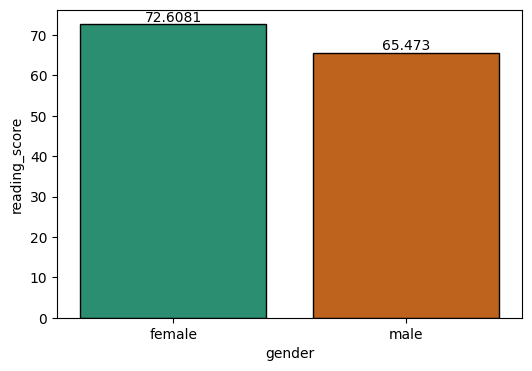

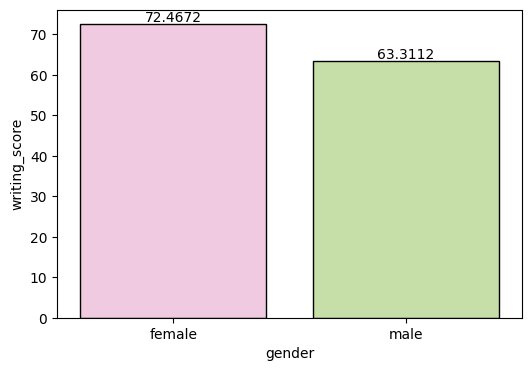

In [22]:
plt.figure(figsize=(6,4))
ax1 = sns.barplot(x=df['gender'],y=df['Avg Score'],palette='Pastel2',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

plt.figure(figsize=(6,4))
ax1 = sns.barplot(x=df['gender'],y=df['math_score'],palette='PRGn',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

plt.figure(figsize=(6,4))
ax1 = sns.barplot(x=df['gender'],y=df['reading_score'],palette='Dark2',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

plt.figure(figsize=(6,4))
ax1 = sns.barplot(x=df['gender'],y=df['writing_score'],palette='PiYG',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)
    
plt.show()

##### Insights
 - On an average females have a better overall score than men.
 - males have scored higher in Maths.
 - females have scored higher in reading and writing.

### Race/ethnicity column

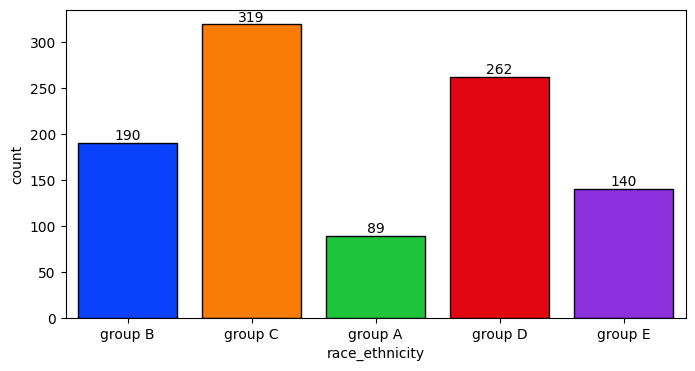

In [24]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x=df['race_ethnicity'],palette='bright',edgecolor='black',saturation=0.95)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

plt.show()

##### Insights
 - Most of the student belonging from group C /group D.
 - Lowest number of students belong to groupA.

#### Checking if gender has any impact on student's performance ?

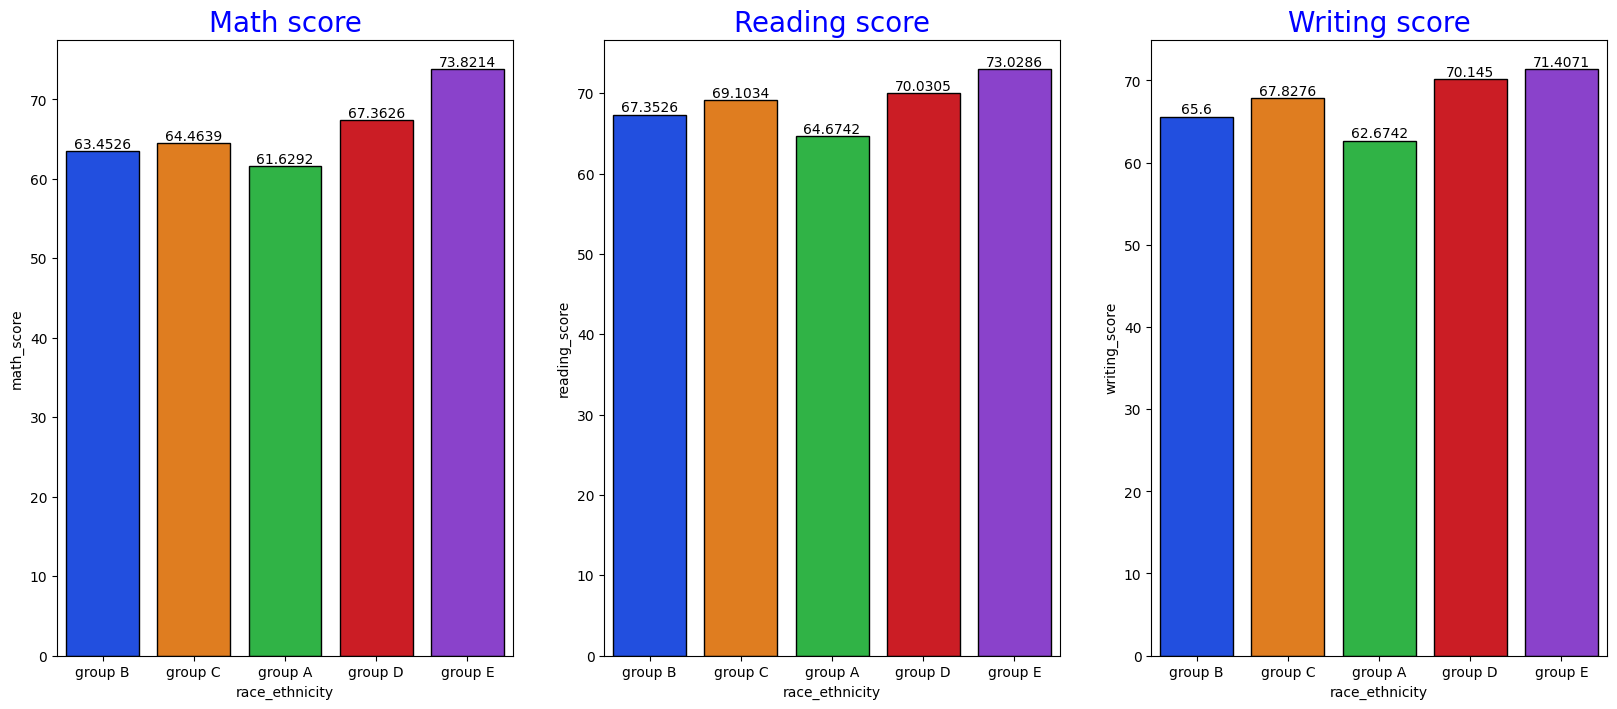

In [25]:
group_type = df.groupby('race_ethnicity')

f, ax = plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=df['race_ethnicity'],y=df['math_score'],palette='bright',edgecolor='black',errorbar=None,ax=ax[0])
ax[0].set_title('Math score',color='blue',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
sns.barplot(x=df['race_ethnicity'],y=df['reading_score'],palette='bright',edgecolor='black',errorbar=None,ax=ax[1])
ax[1].set_title('Reading score',color='blue',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)
    
sns.barplot(x=df['race_ethnicity'],y=df['writing_score'],palette='bright',edgecolor='black',errorbar=None,ax=ax[2])
ax[2].set_title('Writing score',color='blue',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)

plt.show()

##### Insights
 - Group E students have scored the highest marks.
 - Group A students have scored the lowest marks.
 - Students from a lower Socioeconomic status have a lower avg in all course subjects

### Parental level of education column

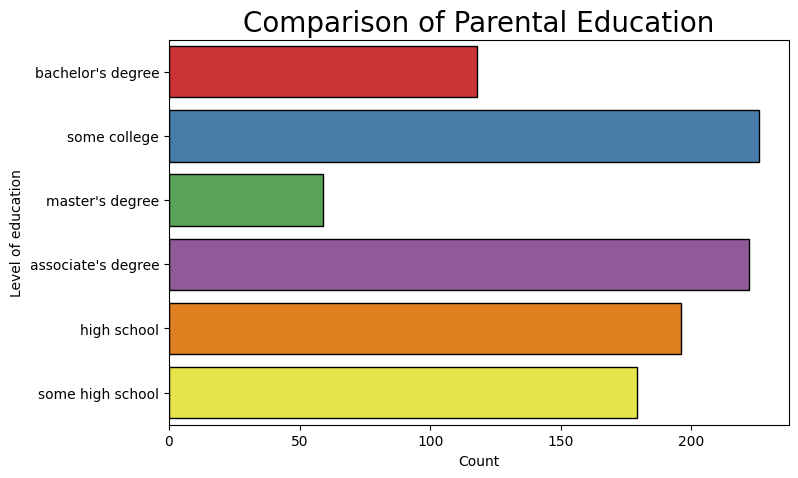

In [26]:
plt.figure(figsize=(8,5))
ax1 = sns.countplot(df['parental_level_of_education'],palette='Set1',edgecolor='black')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Level of education')
plt.show()

##### Insights
 - Largest number of parents are from some college.

#### Does parental education has any impact on student's performance ?

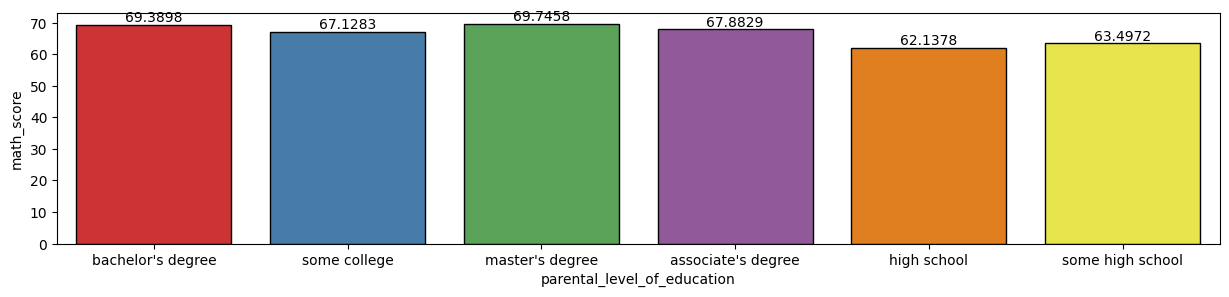

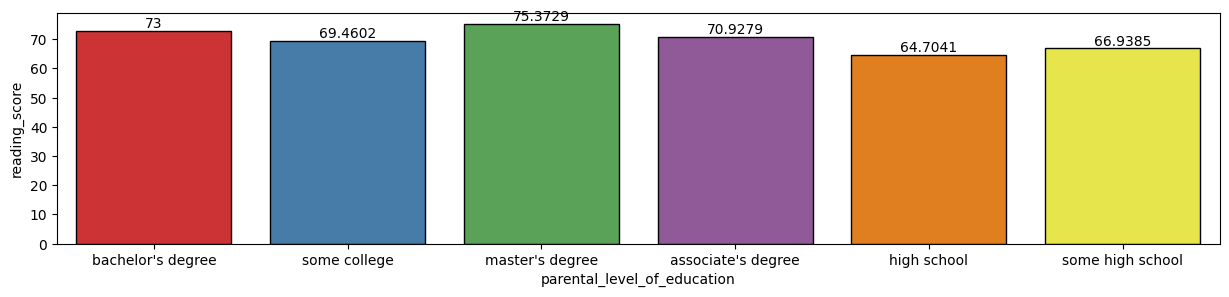

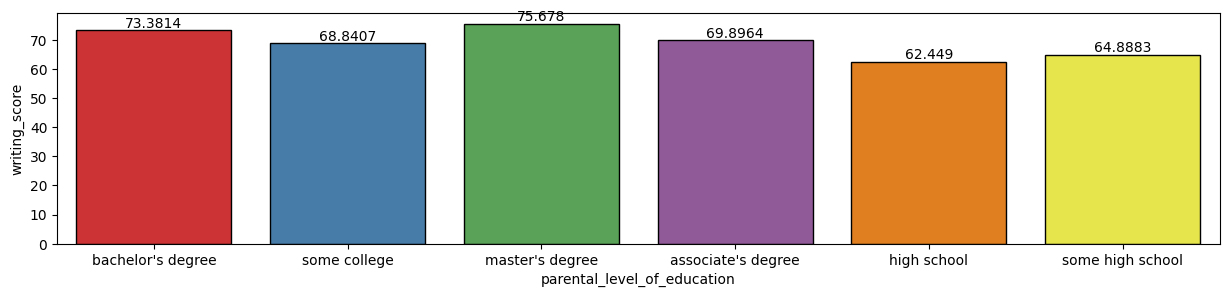

In [27]:
plt.figure(figsize=(15,3))
ax1 = sns.barplot(x=df['parental_level_of_education'],y=df['math_score'],palette='Set1',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

plt.figure(figsize=(15,3))
ax1 = sns.barplot(x=df['parental_level_of_education'],y=df['reading_score'],palette='Set1',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)
    
plt.figure(figsize=(15,3))
ax1 = sns.barplot(x=df['parental_level_of_education'],y=df['writing_score'],palette='Set1',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

##### Insights
 - The score of student whose parents possess master and bachelor level education are higher than others.

### Lunch column 

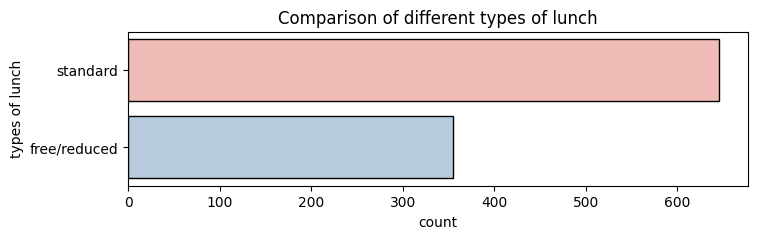

In [28]:
plt.figure(figsize=(8,2))
sns.countplot(df['lunch'], palette = 'Pastel1',edgecolor='black')
plt.title('Comparison of different types of lunch')
plt.ylabel('types of lunch')
plt.xlabel('count')
plt.show()

##### Insights
 - Students being served Standard lunch was more than free lunch

#### Does lunch type intake has any impact on student's performance ? 

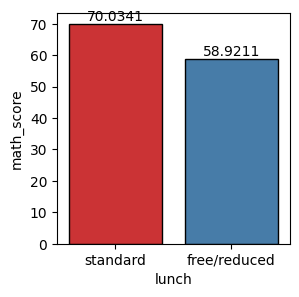

In [29]:
plt.figure(figsize=(3,3))
ax1 = sns.barplot(x=df['lunch'],y=df['math_score'],palette='Set1',edgecolor='black',errorbar=None)
for container in ax1.containers:
    ax1.bar_label(container,color='black',size=10)

##### Insights
 - Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### Test preparation course column

#### Does Test prepration course has any impact on student's performance ?

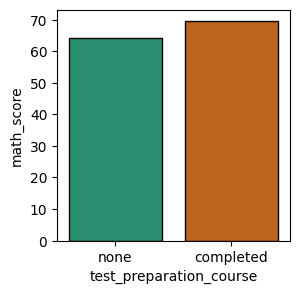

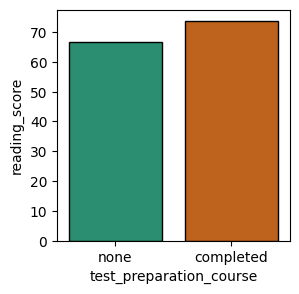

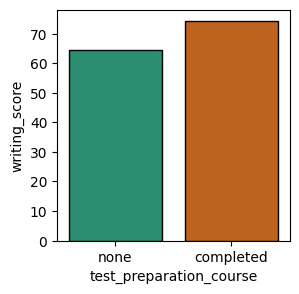

In [30]:
plt.figure(figsize=(3,3))
sns.barplot (y=df['math_score'], x=df['test_preparation_course'],palette='Dark2',edgecolor='black',errorbar=None)

plt.figure(figsize=(3,3))
sns.barplot (y=df['reading_score'], x=df['test_preparation_course'],palette='Dark2',edgecolor='black',errorbar=None)

plt.figure(figsize=(3,3))
sns.barplot(y=df['writing_score'], x=df['test_preparation_course'],palette='Dark2',edgecolor='black',errorbar=None)
plt.show()

##### Insights
 - Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### MUTIVARIATE ANALYSIS USING PAIRPLOT

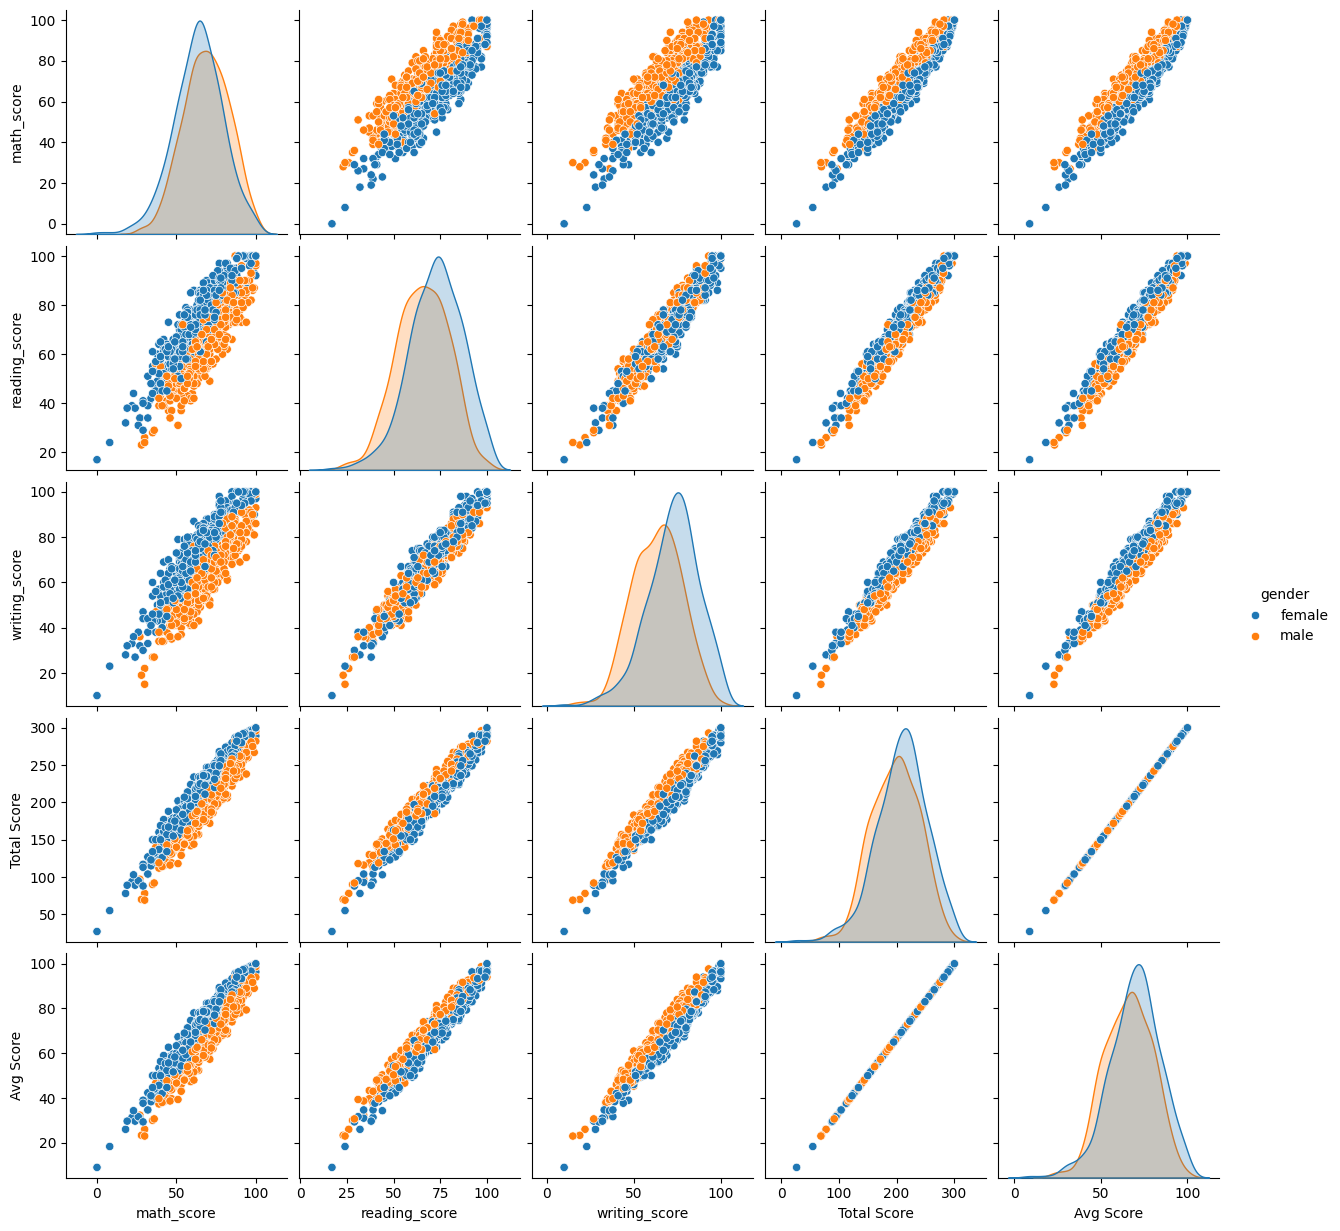

In [31]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
 - From the above plot it is clear that all the scores increase linearly with each other.

## Conclusions
 - Student's Performance is related with lunch, race, parental level education
 - Females have scored better than men.
 - Student's Performance is not much related with test preparation course.
 - Finishing preparation course is benefitial.